# Project

## Overview

For this project you must create a data set by simulating a real-world phenomenon of your choosing. In this project you should:

 - Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
 - Investigate the types of variables involved, their likely distributions, and their relationships with each other.
 - Synthesise/simulate a data set as closely matching their properties as possible.
 - Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.
 
## Introduction

For this project I have choosen to look at the global CO2 emissions, I have taken the data set from owid co2data<sup>1</sup>.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os


dfco2_Data = pd.read_excel("owid-co2-data.xlsx")

## Examining the Data

In [3]:
dfco2_Data.head()

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.0,0.070,NaN,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.7,0.007,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.0,0.000,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.0,0.015,NaN,0.013,NaN,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


In [4]:
dfco2_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25204 entries, 0 to 25203
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             21948 non-null  object 
 1   country                              25204 non-null  object 
 2   year                                 25204 non-null  int64  
 3   co2                                  23949 non-null  float64
 4   consumption_co2                      3976 non-null   float64
 5   co2_growth_prct                      24931 non-null  float64
 6   co2_growth_abs                       23585 non-null  float64
 7   trade_co2                            3976 non-null   float64
 8   co2_per_capita                       23307 non-null  float64
 9   consumption_co2_per_capita           3976 non-null   float64
 10  share_global_co2                     23949 non-null  float64
 11  cumulative_co2              

In [5]:
dfco2_Data.describe()

,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
count,25204.000000,23949.000000,3976.000000,24931.000000,23585.000000,3976.000000,23307.000000,3976.000000,23949.000000,2.394900e+04,...,5155.000000,5211.000000,5157.000000,5211.000000,5157.000000,2.287800e+04,1.353800e+04,8690.000000,8681.000000,6803.000000
mean,1953.225797,267.861942,916.755170,21.098600,5.146889,-2.415624,4.170811,6.567721,4.983979,1.035710e+04,...,8.099506,82.253370,2.046923,29.308135,0.606690,7.072322e+07,2.877088e+11,1569.083895,25568.487454,1.850291
std,53.791369,1521.680894,3373.348275,702.565991,55.259760,182.444942,14.912201,6.927957,17.704994,6.120603e+04,...,9.387477,566.702756,3.534126,199.291118,0.844671,3.795858e+08,2.180094e+12,9066.102799,33319.956208,1.575161
min,1750.000000,0.000000,0.197000,-99.640000,-1895.244000,-1657.998000,0.000000,0.055000,0.000000,0.000000e+00,...,-50.487000,0.000000,0.000000,0.000000,0.000000,1.490000e+03,5.543200e+07,0.000000,0.000000,0.050000
25%,1925.000000,0.528000,10.319750,-0.450000,-0.011000,-0.892500,0.253000,1.240250,0.010000,6.992000e+00,...,2.514000,2.150000,0.715000,0.535000,0.228000,1.291899e+06,9.828867e+09,6.997000,3270.369000,0.856000
50%,1967.000000,4.857000,57.091000,3.350000,0.059000,1.953000,1.250000,4.359500,0.060000,9.131800e+01,...,5.474000,9.030000,1.111000,3.590000,0.384000,4.880320e+06,3.037019e+10,61.404500,13701.318000,1.407000
75%,1995.000000,42.818000,276.378750,10.460000,1.103000,9.700500,4.657500,9.848500,0.600000,1.147514e+03,...,10.299000,31.055000,1.690000,10.570000,0.607000,1.759622e+07,1.268944e+11,352.884500,35493.775000,2.351000
max,2020.000000,36702.503000,36702.503000,102318.510000,1736.258000,1028.487000,748.639000,57.792000,100.000000,1.696524e+06,...,86.991000,8660.010000,39.812000,3054.000000,8.239000,7.794799e+09,1.136302e+14,162194.290000,317582.498000,13.493000


## Creating CO2 Emission Dataframe

In [6]:
dfc02emission=dfco2_Data[['country','year','co2', 'population']]

In [7]:
dfc02emission.set_index('country')

,year,co2,population
country,,,
Afghanistan,1949,0.015,7624058.0
Afghanistan,1950,0.084,7752117.0
Afghanistan,1951,0.092,7840151.0
Afghanistan,1952,0.092,7935996.0
Afghanistan,1953,0.106,8039684.0
...,...,...,...
Zimbabwe,2016,10.738,14030338.0
Zimbabwe,2017,9.582,14236599.0
Zimbabwe,2018,11.854,14438812.0


In [8]:
dfc02emission.describe()

,year,co2,population
count,25204.000000,23949.000000,2.287800e+04
mean,1953.225797,267.861942,7.072322e+07
std,53.791369,1521.680894,3.795858e+08
min,1750.000000,0.000000,1.490000e+03
25%,1925.000000,0.528000,1.291899e+06
50%,1967.000000,4.857000,4.880320e+06
75%,1995.000000,42.818000,1.759622e+07
max,2020.000000,36702.503000,7.794799e+09


In [9]:
dfc02emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25204 entries, 0 to 25203
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     25204 non-null  object 
 1   year        25204 non-null  int64  
 2   co2         23949 non-null  float64
 3   population  22878 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 787.8+ KB


## Exmaining Countries in Central America

In [10]:
ca_data = dfco2_Data.copy()
countries =["Guatemala", "Belize", "Panama","Costa Rica","Nicaragua","Honduras","El Salvador"]

ca_data= ca_data.loc[ca_data['country'].isin(countries)]


In [11]:
ca_data

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
2738,BLZ,Belize,1950,0.018,NaN,NaN,NaN,NaN,0.266,NaN,...,NaN,NaN,NaN,NaN,NaN,68915.0,NaN,NaN,NaN,NaN
2739,BLZ,Belize,1951,0.026,NaN,40.00,0.007,NaN,0.360,NaN,...,NaN,NaN,NaN,NaN,NaN,71239.0,NaN,NaN,NaN,NaN
2740,BLZ,Belize,1952,0.026,NaN,0.00,0.000,NaN,0.349,NaN,...,NaN,NaN,NaN,NaN,NaN,73430.0,NaN,NaN,NaN,NaN
2741,BLZ,Belize,1953,0.029,NaN,14.29,0.004,NaN,0.388,NaN,...,NaN,NaN,NaN,NaN,NaN,75551.0,NaN,NaN,NaN,NaN
2742,BLZ,Belize,1954,0.029,NaN,0.00,0.000,NaN,0.377,NaN,...,NaN,NaN,NaN,NaN,NaN,77688.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17577,PAN,Panama,2016,10.555,23.169,-2.96,-0.322,12.614,2.615,5.739,...,6.673,5.37,1.33,1.34,0.332,4037073.0,7.946854e+10,123.952,30704.049,1.553
17578,PAN,Panama,2017,11.212,23.903,6.22,0.657,12.691,2.730,5.820,...,NaN,NaN,NaN,NaN,NaN,4106764.0,8.334599e+10,NaN,NaN,NaN
17579,PAN,Panama,2018,10.731,24.104,-4.29,-0.481,13.373,2.569,5.771,...,NaN,NaN,NaN,NaN,NaN,4176868.0,8.603574e+10,NaN,NaN,NaN
17580,PAN,Panama,2019,12.294,24.408,14.57,1.563,12.114,2.895,5.748,...,NaN,NaN,NaN,NaN,NaN,4246440.0,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='year', ylabel='co2'>

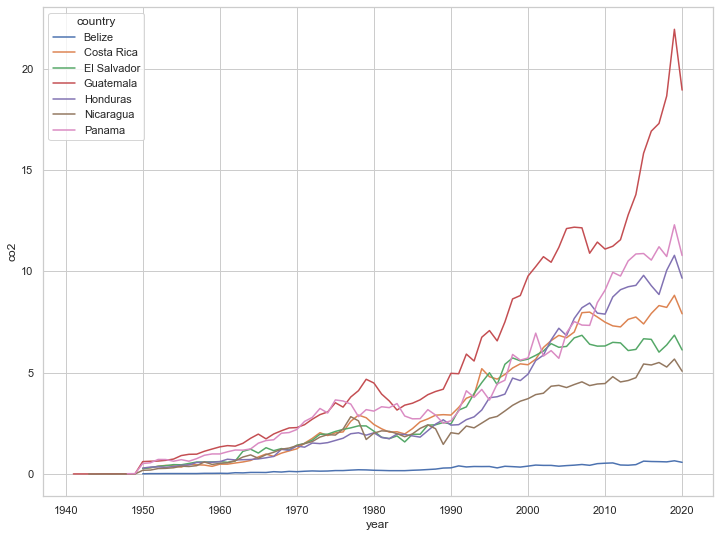

In [12]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=ca_data, x='year', y='co2', hue='country')

## Exmaining Countries in Europe

I have chosen to focus on the countries with the highest and lowest populations in Europe as well as Europe overall. The population data was taken from worldometer<sup>2</sup>.

I then choose to look at the countries with the highest level of GDP and the lowest level of GDP. As the data for GDP was patchy in the original dataset I took the information from eurostat<sup>3</sup>. 

In [19]:
search_name = "Holy See"
dfco2_Data.query('country==@search_name')

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp


In [22]:
eu_data = dfco2_Data.copy()
countries =["Russia", "Germany", "United Kingdom","France","Italy","Spain","Ukraine", "Poland"
           "Romania", "Netherlands", "Belgium", "Czech Republic", "Greece", "Portugal", "Sweden"
           "Hungary", "Belarus", "Austria", "Serbia", "Switzerland", "Bulgaria", "Denmark", "Finland",
           "Slovakia", "Norway", "Ireland", "Croatia", "Moldova", "Bosnia and Herzegovina", "Albania",
           "Lithuania", "North Macedonia", "Slovenia", "Latvia", "Estonia", "Montenegro", "Luxembourg",
           "Malta", "Iceland", "Andorra", "Monaco", "Liechtenstein"]

eu_data= eu_data.loc[eu_data['country'].isin(countries)]

eu_data

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
209,ALB,Albania,1933,0.007,NaN,NaN,NaN,NaN,0.007,NaN,...,NaN,NaN,NaN,NaN,NaN,1032142.0,NaN,NaN,NaN,NaN
210,ALB,Albania,1934,0.007,NaN,0.00,0.000,NaN,0.007,NaN,...,NaN,NaN,NaN,NaN,NaN,1042776.0,NaN,NaN,NaN,NaN
211,ALB,Albania,1935,0.018,NaN,150.00,0.011,NaN,0.017,NaN,...,NaN,NaN,NaN,NaN,NaN,1053520.0,NaN,NaN,NaN,NaN
212,ALB,Albania,1936,0.128,NaN,600.00,0.110,NaN,0.120,NaN,...,NaN,NaN,NaN,NaN,NaN,1064375.0,NaN,NaN,NaN,NaN
213,ALB,Albania,1937,0.297,NaN,131.43,0.169,NaN,0.276,NaN,...,NaN,NaN,NaN,NaN,NaN,1075341.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23842,GBR,United Kingdom,2016,399.337,543.496,-5.45,-23.003,144.159,6.023,8.198,...,6.962,52.27,0.788,28.4,0.428,66297944.0,2.460057e+12,2226.110,33577.337,0.863
23843,GBR,United Kingdom,2017,387.565,536.924,-2.95,-11.772,149.359,5.808,8.046,...,NaN,NaN,NaN,NaN,NaN,66727463.0,2.506604e+12,2219.816,33267.134,NaN
23844,GBR,United Kingdom,2018,381.890,539.458,-1.46,-5.676,157.568,5.688,8.035,...,NaN,NaN,NaN,NaN,NaN,67141678.0,2.540210e+12,2212.342,32950.188,NaN
23845,GBR,United Kingdom,2019,369.010,520.696,-3.37,-12.880,151.687,5.464,7.711,...,NaN,NaN,NaN,NaN,NaN,67530161.0,NaN,2177.825,32249.735,NaN


<AxesSubplot:xlabel='year', ylabel='co2'>

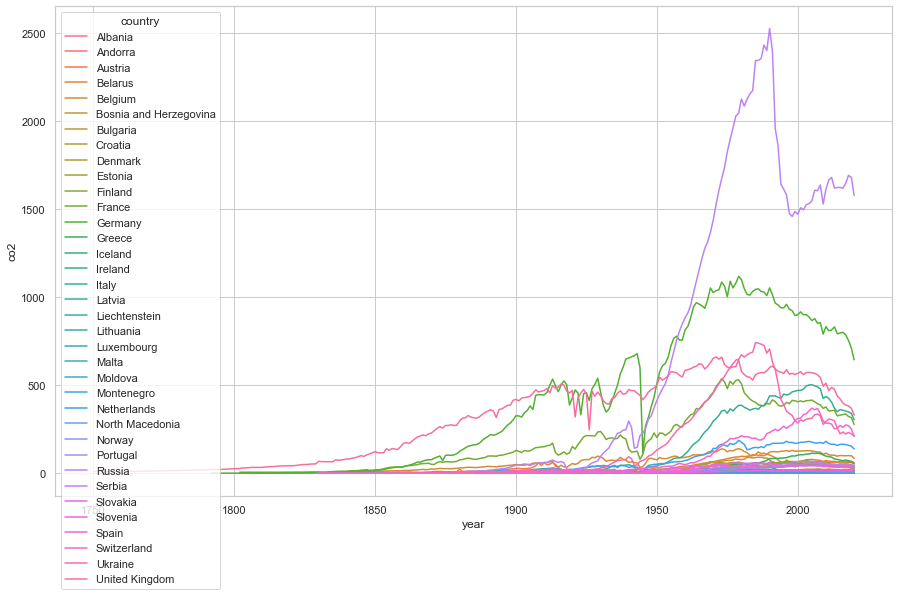

In [24]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=eu_data, x='year', y='co2', hue='country')

It is hard to see the data in the graph above focusing now on highest population

In [26]:
eu_top_pop_data = dfco2_Data.copy()
countries =["Russia", "Germany", "United Kingdom","France","Italy","Spain","Ukraine", "Poland"
           "Romania", "Netherlands"]

In [27]:
eu_top_pop_data = eu_top_pop_data.loc[eu_top_pop_data['country'].isin(countries)]

eu_top_pop_data

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
8539,FRA,France,1802,2.239,NaN,NaN,NaN,NaN,0.077,NaN,...,NaN,NaN,NaN,NaN,NaN,29217510.0,NaN,NaN,NaN,NaN
8540,FRA,France,1803,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,29326876.0,NaN,NaN,NaN,NaN
8541,FRA,France,1804,2.176,NaN,-2.78,NaN,NaN,0.074,NaN,...,NaN,NaN,NaN,NaN,NaN,29436651.0,NaN,NaN,NaN,NaN
8542,FRA,France,1805,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,29546838.0,NaN,NaN,NaN,NaN
8543,FRA,France,1806,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,29657436.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23842,GBR,United Kingdom,2016,399.337,543.496,-5.45,-23.003,144.159,6.023,8.198,...,6.962,52.27,0.788,28.4,0.428,66297944.0,2.460057e+12,2226.110,33577.337,0.863
23843,GBR,United Kingdom,2017,387.565,536.924,-2.95,-11.772,149.359,5.808,8.046,...,NaN,NaN,NaN,NaN,NaN,66727463.0,2.506604e+12,2219.816,33267.134,NaN
23844,GBR,United Kingdom,2018,381.890,539.458,-1.46,-5.676,157.568,5.688,8.035,...,NaN,NaN,NaN,NaN,NaN,67141678.0,2.540210e+12,2212.342,32950.188,NaN
23845,GBR,United Kingdom,2019,369.010,520.696,-3.37,-12.880,151.687,5.464,7.711,...,NaN,NaN,NaN,NaN,NaN,67530161.0,NaN,2177.825,32249.735,NaN


<AxesSubplot:xlabel='year', ylabel='co2'>

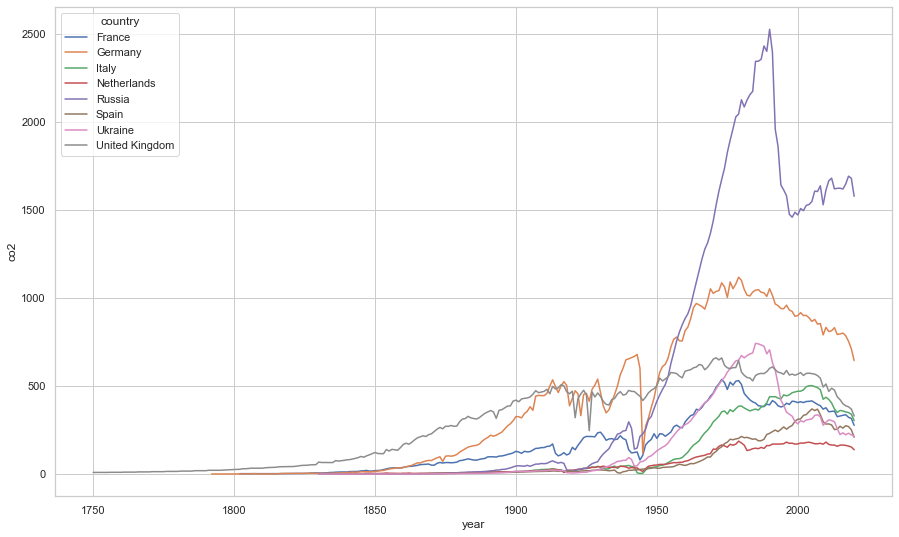

In [28]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=eu_top_pop_data, x='year', y='co2', hue='country')

In [29]:
eu_low_pop_data = dfco2_Data.copy()
countries =["Latvia", "Estonia", "Montenegro", "Luxembourg",
           "Malta", "Iceland", "Andorra", "Monaco", "Liechtenstein"]

In [30]:
eu_low_pop_data = eu_low_pop_data.loc[eu_low_pop_data['country'].isin(countries)]

eu_low_pop_data

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
402,AND,Andorra,1990,0.407,NaN,NaN,NaN,NaN,7.461,NaN,...,7.455,0.02,0.364,0.00,0.000,54508.0,NaN,NaN,NaN,NaN
403,AND,Andorra,1991,0.407,NaN,0.00,0.000,NaN,7.177,NaN,...,7.193,0.02,0.351,0.00,0.000,56666.0,NaN,NaN,NaN,NaN
404,AND,Andorra,1992,0.407,NaN,0.00,0.000,NaN,6.907,NaN,...,6.949,0.02,0.339,0.00,0.000,58882.0,NaN,NaN,NaN,NaN
405,AND,Andorra,1993,0.410,NaN,0.90,0.004,NaN,6.730,NaN,...,6.885,0.03,0.492,0.00,0.000,60974.0,NaN,NaN,NaN,NaN
406,AND,Andorra,1994,0.407,NaN,-0.89,-0.004,NaN,6.489,NaN,...,6.667,0.03,0.476,0.00,0.000,62676.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15013,MNE,Montenegro,2016,2.015,NaN,-9.98,-0.224,NaN,3.213,NaN,...,5.455,0.83,1.324,0.18,0.287,627271.0,1.096616e+10,12.472,19890.785,1.06
15014,MNE,Montenegro,2017,2.103,NaN,4.36,0.088,NaN,3.351,NaN,...,NaN,NaN,NaN,NaN,NaN,627563.0,1.144381e+10,NaN,NaN,NaN
15015,MNE,Montenegro,2018,2.400,NaN,14.11,0.297,NaN,3.823,NaN,...,NaN,NaN,NaN,NaN,NaN,627803.0,1.198041e+10,NaN,NaN,NaN
15016,MNE,Montenegro,2019,2.645,NaN,10.21,0.245,NaN,4.212,NaN,...,NaN,NaN,NaN,NaN,NaN,627988.0,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='year', ylabel='co2'>

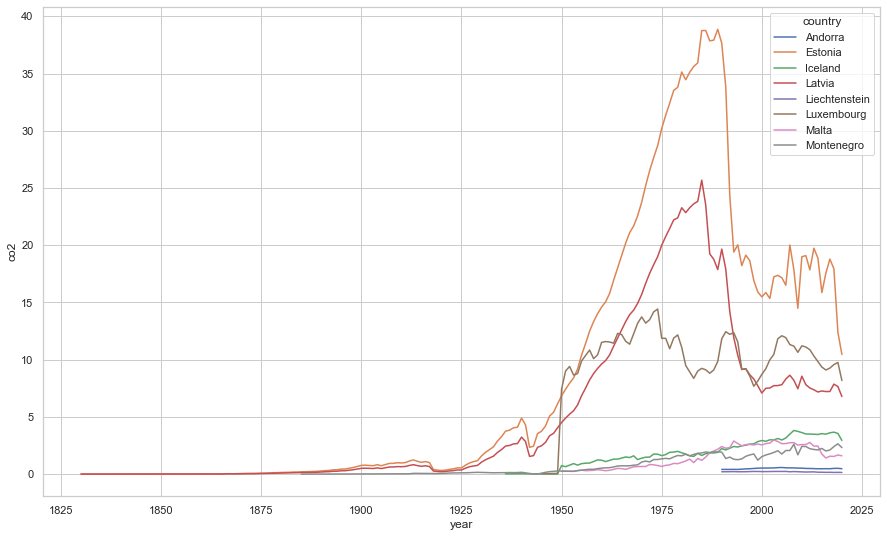

In [31]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=eu_low_pop_data, x='year', y='co2', hue='country')

In [32]:
eu_top_low_pop_data = dfco2_Data.copy()
countries =["Russia", "Germany", "United Kingdom","France","Italy","Spain","Ukraine", "Poland"
           "Romania", "Netherlands", "Latvia", "Estonia", "Montenegro", "Luxembourg",
           "Malta", "Iceland", "Andorra", "Monaco", "Liechtenstein"]

In [33]:
eu_top_low_pop_data = eu_top_low_pop_data.loc[eu_top_low_pop_data['country'].isin(countries)]

eu_top_low_pop_data

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
402,AND,Andorra,1990,0.407,NaN,NaN,NaN,NaN,7.461,NaN,...,7.455,0.02,0.364,0.0,0.000,54508.0,NaN,NaN,NaN,NaN
403,AND,Andorra,1991,0.407,NaN,0.00,0.000,NaN,7.177,NaN,...,7.193,0.02,0.351,0.0,0.000,56666.0,NaN,NaN,NaN,NaN
404,AND,Andorra,1992,0.407,NaN,0.00,0.000,NaN,6.907,NaN,...,6.949,0.02,0.339,0.0,0.000,58882.0,NaN,NaN,NaN,NaN
405,AND,Andorra,1993,0.410,NaN,0.90,0.004,NaN,6.730,NaN,...,6.885,0.03,0.492,0.0,0.000,60974.0,NaN,NaN,NaN,NaN
406,AND,Andorra,1994,0.407,NaN,-0.89,-0.004,NaN,6.489,NaN,...,6.667,0.03,0.476,0.0,0.000,62676.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23842,GBR,United Kingdom,2016,399.337,543.496,-5.45,-23.003,144.159,6.023,8.198,...,6.962,52.27,0.788,28.4,0.428,66297944.0,2.460057e+12,2226.110,33577.337,0.863
23843,GBR,United Kingdom,2017,387.565,536.924,-2.95,-11.772,149.359,5.808,8.046,...,NaN,NaN,NaN,NaN,NaN,66727463.0,2.506604e+12,2219.816,33267.134,NaN
23844,GBR,United Kingdom,2018,381.890,539.458,-1.46,-5.676,157.568,5.688,8.035,...,NaN,NaN,NaN,NaN,NaN,67141678.0,2.540210e+12,2212.342,32950.188,NaN
23845,GBR,United Kingdom,2019,369.010,520.696,-3.37,-12.880,151.687,5.464,7.711,...,NaN,NaN,NaN,NaN,NaN,67530161.0,NaN,2177.825,32249.735,NaN


<AxesSubplot:xlabel='year', ylabel='co2'>

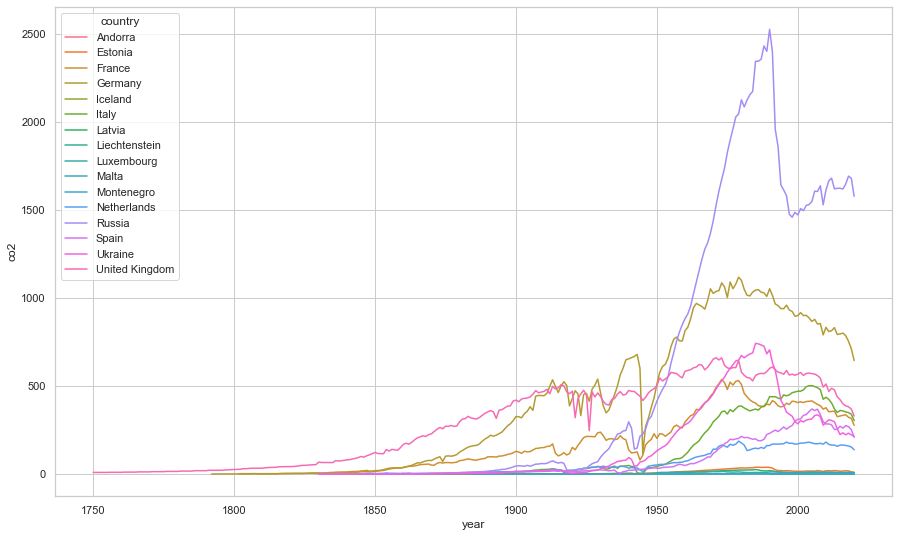

In [34]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=eu_top_low_pop_data, x='year', y='co2', hue='country')

By combining the highest population data with the lowest population data it is possible to see the difference clearer than when they are plotted on different plots.

The plot for the lowest population countries did not reach 40 on the y-axis, whereas the highest populations reached over 2500, for one country alone.

I will examine below if there is a correlation between GDP and CO2.

In [36]:
eu_top_gdp_data = dfco2_Data.copy()
countries =["Luxembourg", "Ireland", "Switzerland","Norway","Denmark","Netherlands",
            "Austria", "Sweden", "Germany", "Iceland"]
eu_top_gdp_data = eu_top_gdp_data.loc[eu_top_gdp_data['country'].isin(countries)]

eu_top_gdp_data

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
1596,AUT,Austria,1807,0.169,NaN,NaN,NaN,NaN,0.054,NaN,...,NaN,NaN,NaN,NaN,NaN,3124310.0,NaN,NaN,NaN,NaN
1597,AUT,Austria,1808,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3142485.0,NaN,NaN,NaN,NaN
1598,AUT,Austria,1809,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3160765.0,NaN,NaN,NaN,NaN
1599,AUT,Austria,1810,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3179258.0,NaN,NaN,NaN,NaN
1600,AUT,Austria,1811,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3197752.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21893,CHE,Switzerland,2016,39.193,117.007,1.19,0.462,77.815,4.677,13.963,...,5.575,4.86,0.58,2.19,0.261,8379915.0,5.085793e+11,307.959,36749.343,0.587
21894,CHE,Switzerland,2017,38.183,118.900,-2.58,-1.010,80.718,4.516,14.061,...,NaN,NaN,NaN,NaN,NaN,8455797.0,5.177307e+11,308.694,36505.859,NaN
21895,CHE,Switzerland,2018,36.868,120.080,-3.44,-1.315,83.212,4.324,14.085,...,NaN,NaN,NaN,NaN,NaN,8525614.0,5.319712e+11,313.344,36751.572,NaN
21896,CHE,Switzerland,2019,36.742,116.050,-0.34,-0.126,79.308,4.277,13.508,...,NaN,NaN,NaN,NaN,NaN,8591361.0,NaN,313.934,36542.174,NaN


<AxesSubplot:xlabel='year', ylabel='co2'>

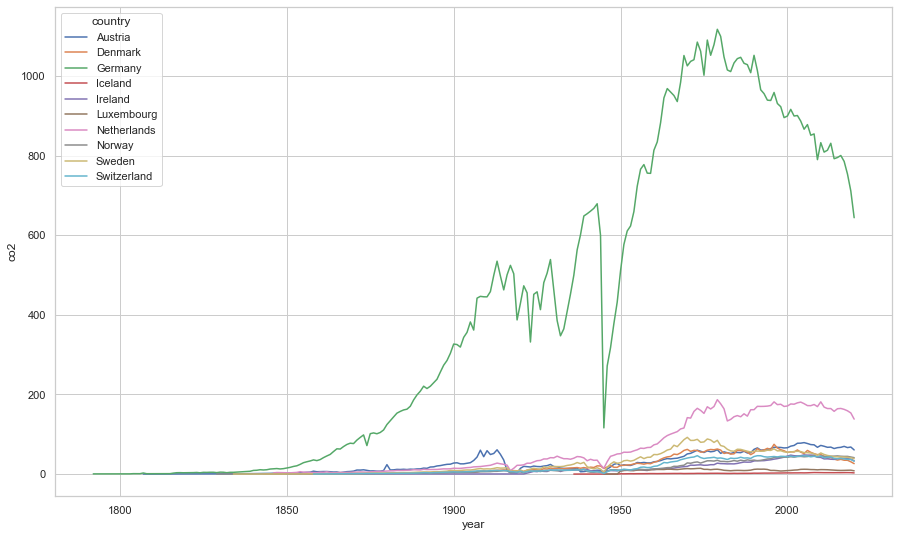

In [38]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=eu_top_gdp_data, x='year', y='co2', hue='country')

As Germany was skewing the data and I could not see a clear representation for the remaining countries I choose to remove it from the list.

In [40]:
eu_top_gdp_noDE_data = dfco2_Data.copy()
countries =["Luxembourg", "Ireland", "Switzerland","Norway","Denmark","Netherlands",
            "Austria", "Sweden", "Iceland"]
eu_top_gdp_noDE_data = eu_top_gdp_noDE_data.loc[eu_top_gdp_noDE_data['country'].isin(countries)]

eu_top_gdp_noDE_data

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
1596,AUT,Austria,1807,0.169,NaN,NaN,NaN,NaN,0.054,NaN,...,NaN,NaN,NaN,NaN,NaN,3124310.0,NaN,NaN,NaN,NaN
1597,AUT,Austria,1808,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3142485.0,NaN,NaN,NaN,NaN
1598,AUT,Austria,1809,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3160765.0,NaN,NaN,NaN,NaN
1599,AUT,Austria,1810,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3179258.0,NaN,NaN,NaN,NaN
1600,AUT,Austria,1811,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3197752.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21893,CHE,Switzerland,2016,39.193,117.007,1.19,0.462,77.815,4.677,13.963,...,5.575,4.86,0.58,2.19,0.261,8379915.0,5.085793e+11,307.959,36749.343,0.587
21894,CHE,Switzerland,2017,38.183,118.900,-2.58,-1.010,80.718,4.516,14.061,...,NaN,NaN,NaN,NaN,NaN,8455797.0,5.177307e+11,308.694,36505.859,NaN
21895,CHE,Switzerland,2018,36.868,120.080,-3.44,-1.315,83.212,4.324,14.085,...,NaN,NaN,NaN,NaN,NaN,8525614.0,5.319712e+11,313.344,36751.572,NaN
21896,CHE,Switzerland,2019,36.742,116.050,-0.34,-0.126,79.308,4.277,13.508,...,NaN,NaN,NaN,NaN,NaN,8591361.0,NaN,313.934,36542.174,NaN


<AxesSubplot:xlabel='year', ylabel='co2'>

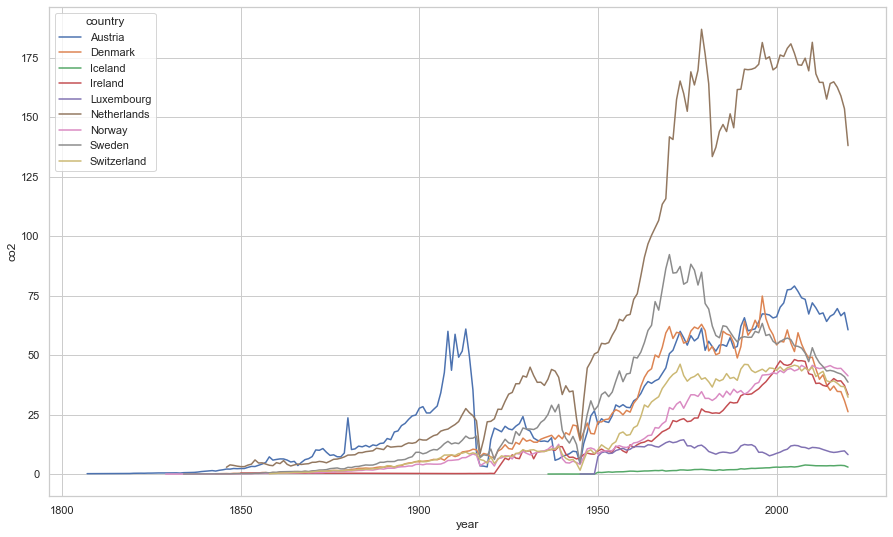

In [41]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=eu_top_gdp_noDE_data, x='year', y='co2', hue='country')

In [37]:
eu_low_gdp_data = dfco2_Data.copy()
countries =["Albania", "Boznia and Herzegovina", "North Macedonia","Serbia","Montenegro",
            "Bulgaria", "Turkey", "Greece", "Croatia", "Slovakia"]
eu_low_gdp_data = eu_low_gdp_data.loc[eu_low_gdp_data['country'].isin(countries)]

eu_low_gdp_data

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
209,ALB,Albania,1933,0.007,NaN,NaN,NaN,NaN,0.007,NaN,...,NaN,NaN,NaN,NaN,NaN,1032142.0,NaN,NaN,NaN,NaN
210,ALB,Albania,1934,0.007,NaN,0.00,0.000,NaN,0.007,NaN,...,NaN,NaN,NaN,NaN,NaN,1042776.0,NaN,NaN,NaN,NaN
211,ALB,Albania,1935,0.018,NaN,150.00,0.011,NaN,0.017,NaN,...,NaN,NaN,NaN,NaN,NaN,1053520.0,NaN,NaN,NaN,NaN
212,ALB,Albania,1936,0.128,NaN,600.00,0.110,NaN,0.120,NaN,...,NaN,NaN,NaN,NaN,NaN,1064375.0,NaN,NaN,NaN,NaN
213,ALB,Albania,1937,0.297,NaN,131.43,0.169,NaN,0.276,NaN,...,NaN,NaN,NaN,NaN,NaN,1075341.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22994,TUR,Turkey,2016,401.240,428.779,5.22,19.908,27.539,5.026,5.371,...,4.96,44.55,0.558,35.18,0.441,79827868.0,1.498503e+12,1669.653,20915.628,1.063
22995,TUR,Turkey,2017,425.329,444.014,6.00,24.089,18.685,5.243,5.474,...,NaN,NaN,NaN,NaN,NaN,81116451.0,1.610457e+12,1770.183,21822.855,NaN
22996,TUR,Turkey,2018,419.437,427.425,-1.39,-5.892,7.988,5.094,5.191,...,NaN,NaN,NaN,NaN,NaN,82340090.0,1.655984e+12,1746.959,21216.411,NaN
22997,TUR,Turkey,2019,399.345,398.699,-4.79,-20.092,-0.646,4.787,4.779,...,NaN,NaN,NaN,NaN,NaN,83429607.0,NaN,1802.849,21609.123,NaN


<AxesSubplot:xlabel='year', ylabel='co2'>

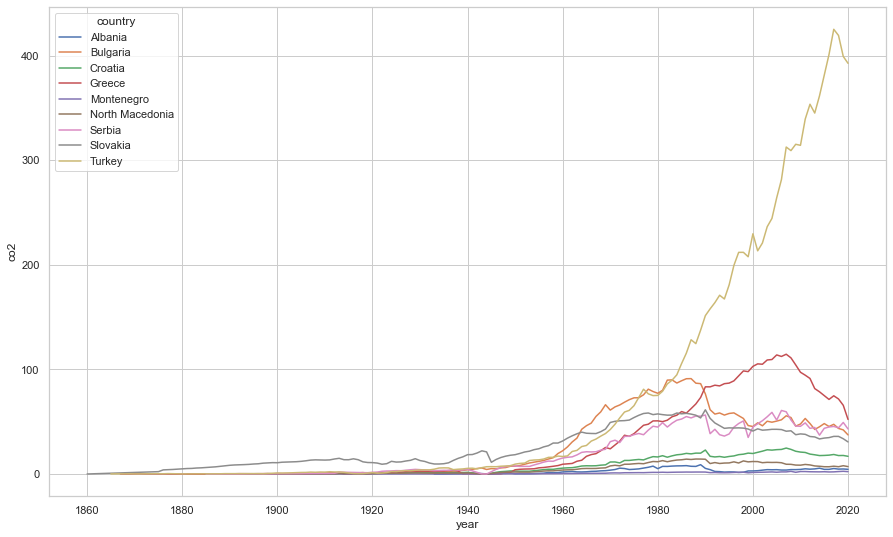

In [39]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=eu_low_gdp_data, x='year', y='co2', hue='country')

As Turkey was skewing the data and I could not see a clear representation for the remaining countries I choose to remove it from the list.

In [42]:
eu_low_gdp_noTR_data = dfco2_Data.copy()
countries =["Albania", "Boznia and Herzegovina", "North Macedonia","Serbia","Montenegro",
            "Bulgaria", "Greece", "Croatia", "Slovakia"]
eu_low_gdp_noTR_data = eu_low_gdp_noTR_data.loc[eu_low_gdp_noTR_data['country'].isin(countries)]

eu_low_gdp_noTR_data

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
209,ALB,Albania,1933,0.007,NaN,NaN,NaN,NaN,0.007,NaN,...,NaN,NaN,NaN,NaN,NaN,1032142.0,NaN,NaN,NaN,NaN
210,ALB,Albania,1934,0.007,NaN,0.00,0.000,NaN,0.007,NaN,...,NaN,NaN,NaN,NaN,NaN,1042776.0,NaN,NaN,NaN,NaN
211,ALB,Albania,1935,0.018,NaN,150.00,0.011,NaN,0.017,NaN,...,NaN,NaN,NaN,NaN,NaN,1053520.0,NaN,NaN,NaN,NaN
212,ALB,Albania,1936,0.128,NaN,600.00,0.110,NaN,0.120,NaN,...,NaN,NaN,NaN,NaN,NaN,1064375.0,NaN,NaN,NaN,NaN
213,ALB,Albania,1937,0.297,NaN,131.43,0.169,NaN,0.276,NaN,...,NaN,NaN,NaN,NaN,NaN,1075341.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20338,SVK,Slovakia,2016,34.856,45.995,1.29,0.445,11.139,6.405,8.452,...,6.161,4.38,0.805,2.01,0.369,5442001.0,1.367961e+11,181.074,33273.469,1.257
20339,SVK,Slovakia,2017,36.031,47.293,3.37,1.175,11.262,6.614,8.681,...,NaN,NaN,NaN,NaN,NaN,5447903.0,1.409634e+11,191.500,35150.550,NaN
20340,SVK,Slovakia,2018,36.030,48.127,0.00,-0.001,12.097,6.607,8.826,...,NaN,NaN,NaN,NaN,NaN,5453017.0,1.464565e+11,188.475,34563.497,NaN
20341,SVK,Slovakia,2019,33.773,46.003,-6.26,-2.256,12.230,6.189,8.430,...,NaN,NaN,NaN,NaN,NaN,5457012.0,NaN,182.581,33458.196,NaN


<AxesSubplot:xlabel='year', ylabel='co2'>

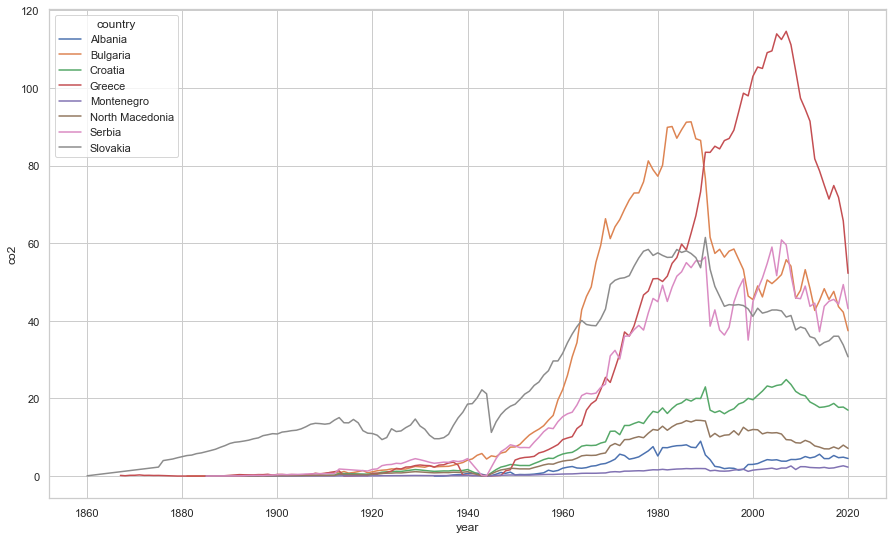

In [43]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=eu_low_gdp_noTR_data, x='year', y='co2', hue='country')

In [44]:
eu_top_low_gdp_noDE_TR_data = dfco2_Data.copy()
countries =["Luxembourg", "Ireland", "Switzerland","Norway","Denmark","Netherlands",
            "Austria", "Sweden", "Iceland", "Albania", "Boznia and Herzegovina", 
            "North Macedonia","Serbia","Montenegro",
            "Bulgaria", "Greece", "Croatia", "Slovakia"]
eu_top_low_gdp_noDE_TR_data = eu_top_low_gdp_noDE_TR_data.loc[eu_top_low_gdp_noDE_TR_data['country'].isin(countries)]

eu_top_low_gdp_noDE_TR_data

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
209,ALB,Albania,1933,0.007,NaN,NaN,NaN,NaN,0.007,NaN,...,NaN,NaN,NaN,NaN,NaN,1032142.0,NaN,NaN,NaN,NaN
210,ALB,Albania,1934,0.007,NaN,0.00,0.000,NaN,0.007,NaN,...,NaN,NaN,NaN,NaN,NaN,1042776.0,NaN,NaN,NaN,NaN
211,ALB,Albania,1935,0.018,NaN,150.00,0.011,NaN,0.017,NaN,...,NaN,NaN,NaN,NaN,NaN,1053520.0,NaN,NaN,NaN,NaN
212,ALB,Albania,1936,0.128,NaN,600.00,0.110,NaN,0.120,NaN,...,NaN,NaN,NaN,NaN,NaN,1064375.0,NaN,NaN,NaN,NaN
213,ALB,Albania,1937,0.297,NaN,131.43,0.169,NaN,0.276,NaN,...,NaN,NaN,NaN,NaN,NaN,1075341.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21893,CHE,Switzerland,2016,39.193,117.007,1.19,0.462,77.815,4.677,13.963,...,5.575,4.86,0.58,2.19,0.261,8379915.0,5.085793e+11,307.959,36749.343,0.587
21894,CHE,Switzerland,2017,38.183,118.900,-2.58,-1.010,80.718,4.516,14.061,...,NaN,NaN,NaN,NaN,NaN,8455797.0,5.177307e+11,308.694,36505.859,NaN
21895,CHE,Switzerland,2018,36.868,120.080,-3.44,-1.315,83.212,4.324,14.085,...,NaN,NaN,NaN,NaN,NaN,8525614.0,5.319712e+11,313.344,36751.572,NaN
21896,CHE,Switzerland,2019,36.742,116.050,-0.34,-0.126,79.308,4.277,13.508,...,NaN,NaN,NaN,NaN,NaN,8591361.0,NaN,313.934,36542.174,NaN


<AxesSubplot:xlabel='year', ylabel='co2'>

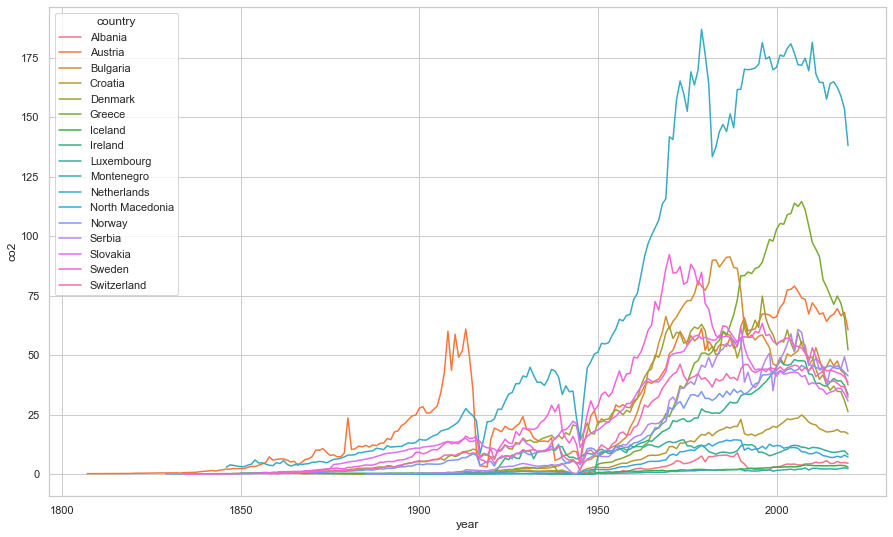

In [45]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,9)})

sns.lineplot(data=eu_top_low_gdp_noDE_TR_data, x='year', y='co2', hue='country')

## Dataframes for each continent

In [12]:
dfafrica=dfc02emission.loc[dfc02emission.country=='Africa']
dfafrica.set_index('country')

,year,co2,population
country,,,
Africa,1884,0.022,1.308486e+08
Africa,1885,0.037,1.315638e+08
Africa,1886,0.048,1.322848e+08
Africa,1887,0.048,1.330118e+08
Africa,1888,0.081,1.337446e+08
...,...,...,...
Africa,2016,1356.719,1.213041e+09
Africa,2017,1384.372,1.244222e+09
Africa,2018,1385.645,1.275921e+09


<AxesSubplot:xlabel='year', ylabel='co2'>

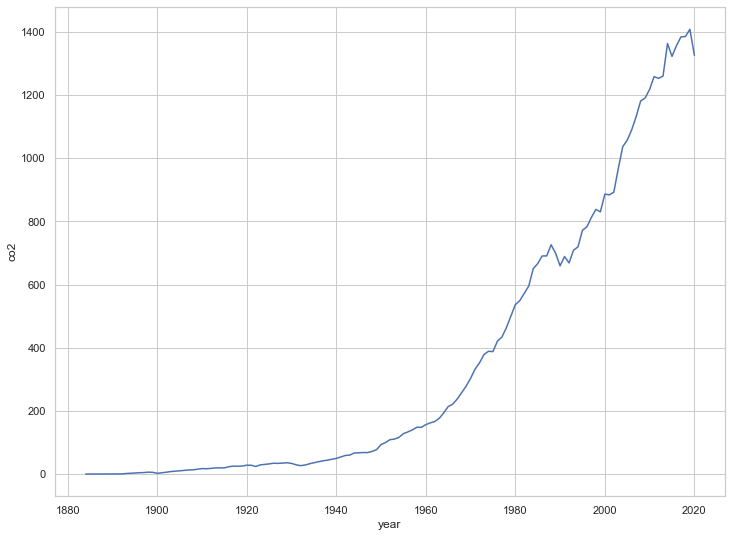

In [13]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfafrica, x='year', y='co2')

In [14]:
dfasia=dfc02emission.loc[dfc02emission.country=='Asia']
dfasia.set_index('country')

,year,co2,population
country,,,
Asia,1830,0.002,7.908359e+08
Asia,1831,0.003,7.936877e+08
Asia,1832,0.002,7.960339e+08
Asia,1833,0.002,7.978705e+08
Asia,1834,NaN,7.997160e+08
...,...,...,...
Asia,2016,19218.166,4.475438e+09
Asia,2017,19653.513,4.517860e+09
Asia,2018,20254.370,4.559478e+09


<AxesSubplot:xlabel='year', ylabel='co2'>

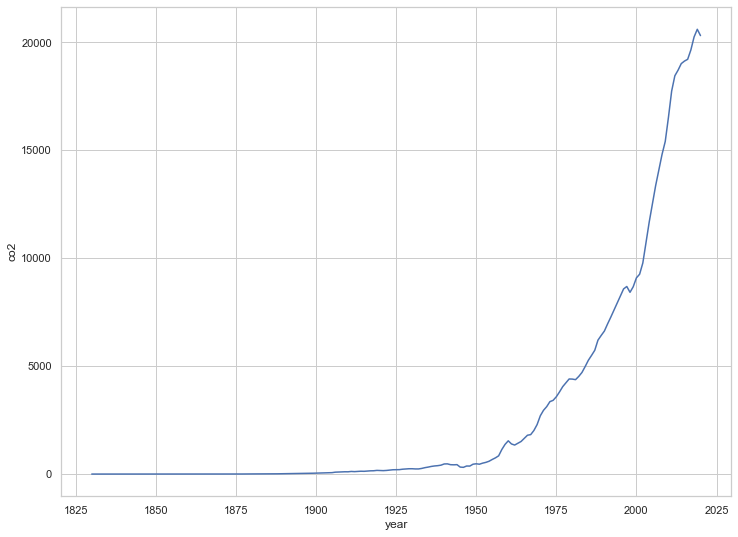

In [15]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfasia, x='year', y='co2')

In [16]:
dfaustralia=dfc02emission.loc[dfc02emission.country=='Australia']
dfaustralia.set_index('country')

,year,co2,population
country,,,
Australia,1860,0.278,1288328.0
Australia,1861,0.509,1350647.0
Australia,1862,0.355,1403026.0
Australia,1863,0.399,1444218.0
Australia,1864,0.267,1486620.0
...,...,...,...
Australia,2016,415.945,24262710.0
Australia,2017,414.751,24584619.0
Australia,2018,416.001,24898153.0


<AxesSubplot:xlabel='year', ylabel='co2'>

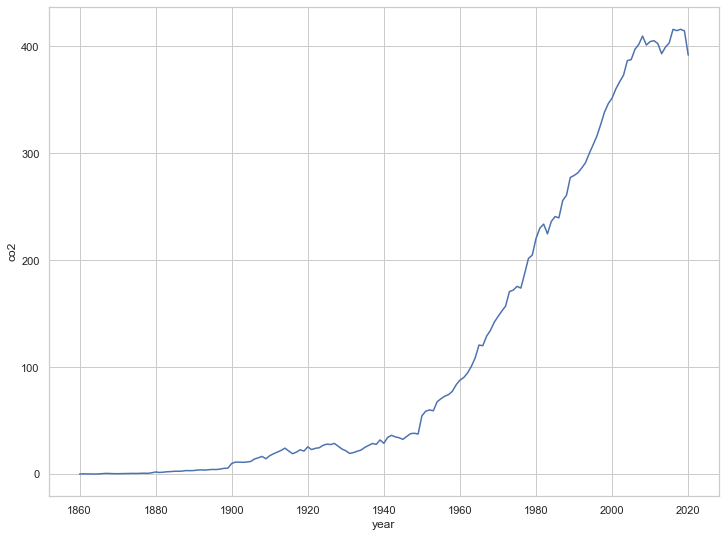

In [17]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfaustralia, x='year', y='co2')

In [18]:
dfeurope=dfc02emission.loc[dfc02emission.country=='Europe']
dfeurope.set_index('country')

,year,co2,population
country,,,
Europe,1750,9.351,150305974.0
Europe,1751,9.351,NaN
Europe,1752,9.354,NaN
Europe,1753,9.354,NaN
Europe,1754,9.358,NaN
...,...,...,...
Europe,2016,5590.253,745441379.0
Europe,2017,5620.307,746596841.0
Europe,2018,5593.057,747608696.0


<AxesSubplot:xlabel='year', ylabel='co2'>

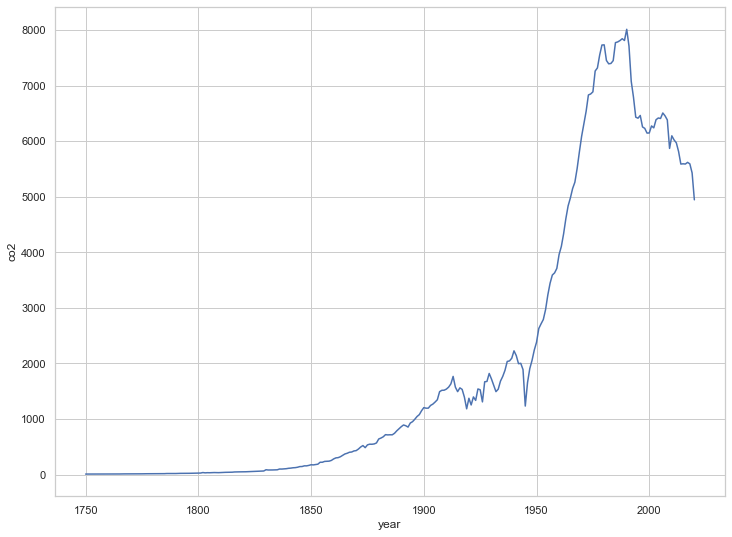

In [19]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfeurope, x='year', y='co2')

In [20]:
dfnamerica=dfc02emission.loc[dfc02emission.country=='North America']
dfnamerica.set_index('country')

,year,co2,population
country,,,
North America,1785,0.004,NaN
North America,1786,0.004,NaN
North America,1787,0.004,NaN
North America,1788,0.004,NaN
North America,1789,0.004,NaN
...,...,...,...
North America,2016,6471.360,573814461.0
North America,2017,6412.982,578582963.0
North America,2018,6588.630,582921781.0


<AxesSubplot:xlabel='year', ylabel='co2'>

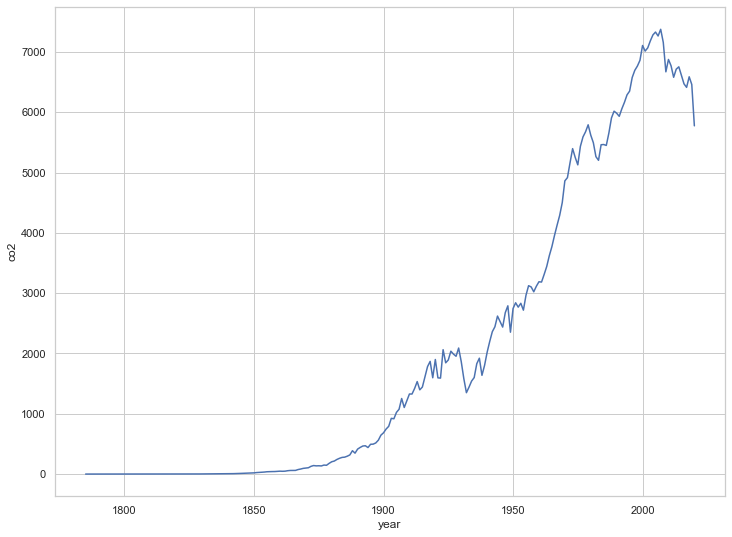

In [21]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfnamerica, x='year', y='co2')

In [22]:
dfsamerica=dfc02emission.loc[dfc02emission.country=='South America']
dfsamerica.set_index('country')

,year,co2,population
country,,,
South America,1884,0.004,30121017.0
South America,1885,0.004,30717090.0
South America,1886,0.007,31328092.0
South America,1887,1.092,31954600.0
South America,1888,0.898,32597223.0
...,...,...,...
South America,2016,1164.898,416164871.0
South America,2017,1156.734,419903920.0
South America,2018,1091.450,423581098.0


<AxesSubplot:xlabel='year', ylabel='co2'>

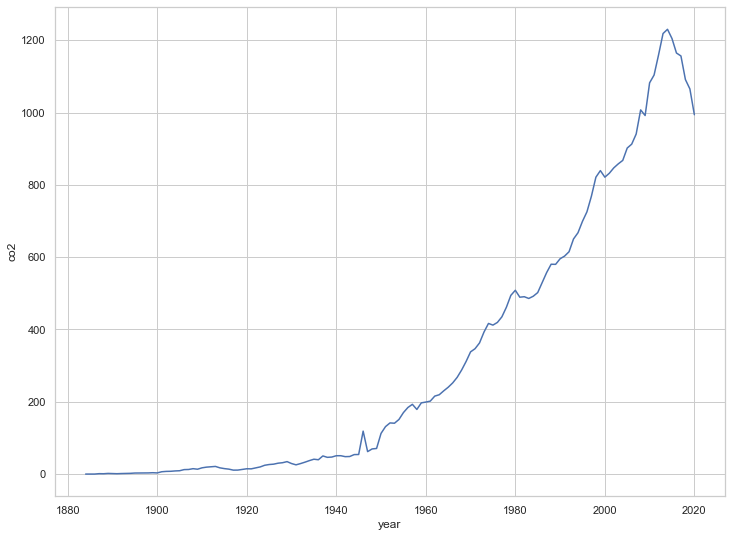

In [23]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfsamerica, x='year', y='co2')

## Global Data

In [80]:
dfglobal_data = dfco2_Data.copy()
countries =["Asia", "Africa", "Australia","Europe","North America","South America"]

dfglobal_data= dfglobal_data.loc[dfglobal_data['country'].isin(countries)]

In [83]:
dfglobal_data

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
72,NaN,Africa,1884,0.022,NaN,NaN,NaN,NaN,0.005,NaN,...,NaN,NaN,NaN,NaN,NaN,130848603.0,NaN,NaN,NaN,NaN
73,NaN,Africa,1885,0.037,NaN,66.67,0.015,NaN,0.008,NaN,...,NaN,NaN,NaN,NaN,NaN,131563803.0,NaN,NaN,NaN,NaN
74,NaN,Africa,1886,0.048,NaN,30.00,0.011,NaN,0.010,NaN,...,NaN,NaN,NaN,NaN,NaN,132284841.0,NaN,NaN,NaN,NaN
75,NaN,Africa,1887,0.048,NaN,0.00,0.000,NaN,0.010,NaN,...,NaN,NaN,NaN,NaN,NaN,133011765.0,NaN,NaN,NaN,NaN
76,NaN,Africa,1888,0.081,NaN,69.23,0.033,NaN,0.017,NaN,...,NaN,NaN,NaN,NaN,NaN,133744628.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20888,NaN,South America,2016,1164.898,1240.096,-3.32,-40.064,75.198,2.799,2.980,...,NaN,NaN,NaN,NaN,NaN,416164871.0,NaN,NaN,NaN,NaN
20889,NaN,South America,2017,1156.734,1238.620,-0.70,-8.164,81.886,2.755,2.950,...,NaN,NaN,NaN,NaN,NaN,419903920.0,NaN,NaN,NaN,NaN
20890,NaN,South America,2018,1091.450,1173.851,-5.64,-65.284,82.401,2.577,2.771,...,NaN,NaN,NaN,NaN,NaN,423581098.0,NaN,NaN,NaN,NaN
20891,NaN,South America,2019,1065.510,1139.737,-2.38,-25.940,74.228,2.494,2.668,...,NaN,NaN,NaN,NaN,NaN,427199425.0,NaN,NaN,NaN,NaN


In [86]:
dfglobal_data.describe()

,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
count,1133.000000,1111.000000,180.000000,1127.000000,1102.00000,180.000000,1052.000000,180.000000,1111.000000,1111.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,1.074000e+03,1.590000e+02,220.000000,220.000000,52.000000
mean,1919.406884,1486.416851,4576.630350,26.360781,30.61728,-133.733839,4.060080,7.508461,24.196886,55461.484594,...,28.974259,152.094815,7.688519,81.926667,4.131074,5.110882e+08,2.299493e+11,13134.111045,46862.832795,2.100173
std,65.552783,2903.949952,4658.179283,487.258226,131.98263,500.154555,4.991994,5.933720,31.292559,113145.313246,...,3.650559,16.966428,1.404896,16.558690,0.953121,7.720417e+08,3.158811e+11,11799.845453,33941.898895,0.330698
min,1750.000000,0.002000,245.907000,-57.770000,-685.56800,-1657.998000,0.000000,0.705000,0.000000,0.002000,...,21.394000,121.110000,5.033000,56.130000,2.357000,1.288328e+06,6.036576e+09,405.358000,2178.898000,1.527000
25%,1877.000000,21.269500,634.872000,0.030000,0.00400,-275.696500,0.506250,2.222500,1.015000,345.205500,...,27.708500,139.205000,6.434000,71.370000,3.271000,6.128806e+07,2.334175e+10,1478.416000,15675.508000,1.836250
50%,1926.000000,215.670000,3572.678500,3.690000,2.42600,-39.216000,1.584000,5.987000,4.780000,4192.222000,...,29.143000,153.780000,7.735000,80.190000,4.385000,2.610533e+08,6.495578e+10,8938.315500,35449.087000,2.189500
75%,1973.000000,1385.008500,7045.082750,8.230000,26.35475,82.797000,5.557500,13.901500,40.300000,38650.851500,...,30.950000,162.045000,8.882000,90.445000,4.792000,6.638033e+08,3.209613e+11,24076.400500,72940.038250,2.336000
max,2020.000000,20608.593000,19125.189000,14800.000000,1215.68100,668.203000,19.455000,17.914000,100.000000,532916.155000,...,36.519000,187.380000,9.762000,117.670000,6.130000,4.639847e+09,1.238560e+12,32718.297000,101186.932000,2.590000


<AxesSubplot:xlabel='year', ylabel='co2'>

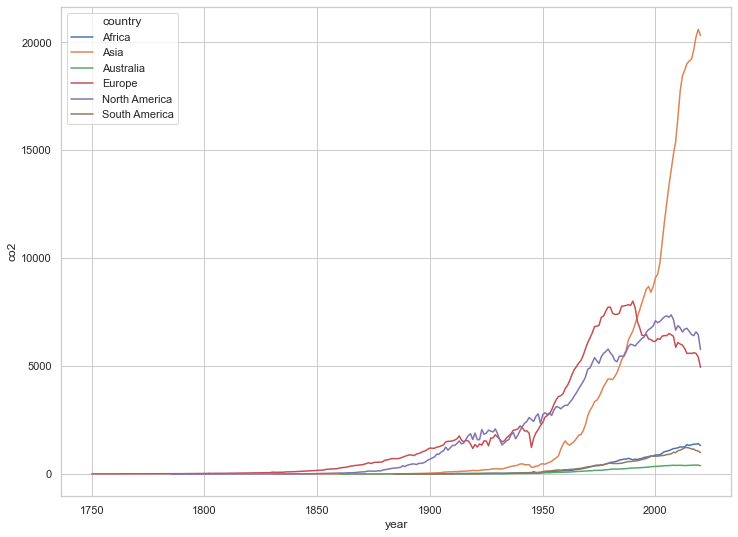

In [87]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfglobal_data, x='year', y='co2', hue='country')

<AxesSubplot:xlabel='year', ylabel='population'>

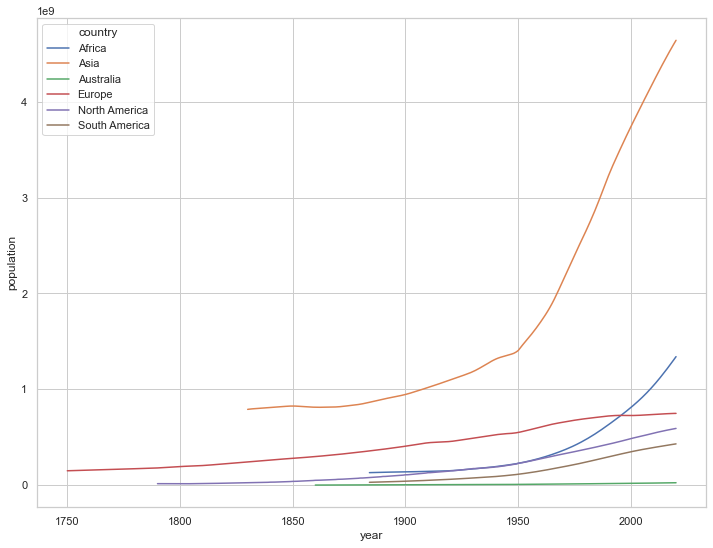

In [88]:
sns.set(style="whitegrid", rc={'figure.figsize':(12,9)})

sns.lineplot(data=dfglobal_data, x='year', y='population', hue='country')

## References
<sup>1</sup>[owidco2data](https://github.com/owid/co2-data/blob/master/owid-co2-data.xlsx)  